In [34]:
# import package needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Read the row data from online link
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [24]:
# Show the dataframe used for analysis
df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service
996,997,66,Female,West,2020-05-06 01:53:37.667895,Standard,14.99,Credit Card,20.153308,Action,Mobile,3.222521,1069,4,0,NaN,NaN
997,998,52,Other,South,2019-06-19 01:53:37.667906,Standard,14.99,PayPal,39.170314,Drama,PC,1.221380,1079,1,0,NaN,NaN
998,999,69,Male,East,2020-11-13 01:53:37.667917,Standard,14.99,Credit Card,8.455372,Sci-Fi,Mobile,1.865411,1092,2,1,2021-04-05 01:53:37.667917,Found better service


In [25]:
# Calculate and Compare Churned rate  in different Subscription Types
# Exhibit 2-1

count_df = df.groupby(['Subscription_Type','Churned']).size().reset_index(name='Count' )
total_counts = df['Subscription_Type'].value_counts().reset_index()
total_counts.columns = ['Subscription_Type', 'TotalCount']
count_df = count_df.merge(total_counts, on='Subscription_Type')
count_df['Percentage'] = (count_df['Count'] / count_df['TotalCount']) * 100
print(count_df)

  Subscription_Type  Churned  Count  TotalCount  Percentage
0             Basic        0    203         276   73.550725
1             Basic        1     73         276   26.449275
2           Premium        0    145         194   74.742268
3           Premium        1     49         194   25.257732
4          Standard        0    406         530   76.603774
5          Standard        1    124         530   23.396226


<Axes: xlabel='Subscription_Type', ylabel='Count'>

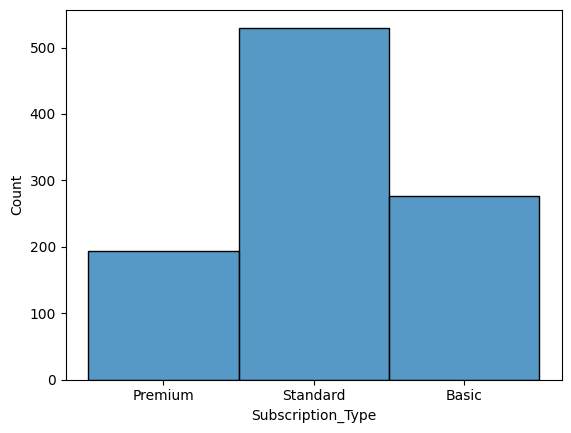

In [26]:
# build a Histogram to compare the volume of subscribers in different Subscription Types
# Exhibit 3-1
sns.histplot(df['Subscription_Type'])

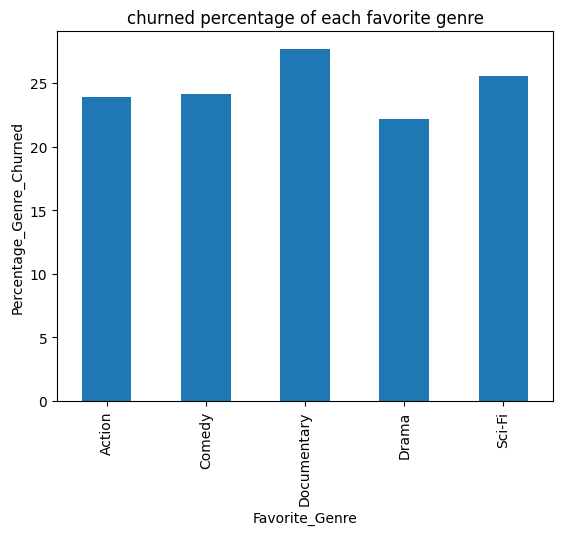

In [20]:
# Characterize subscribers by different Favorite Genres,
# Cauculate and compare churn rate in each different group
# Exhibit 3-2
Genre_Churned = df[(df['Churned'] == 1)]
Genre_Churned_Counts = Genre_Churned['Favorite_Genre'].value_counts()
Total_Genre_Churned_Counts = df['Favorite_Genre'].value_counts()
Percentage_Genre_Churned = Genre_Churned_Counts/Total_Genre_Churned_Counts*100

Percentage_Genre_Churned.plot.bar() 
plt.title('churned percentage of each favorite genre')
plt.ylabel('Percentage_Genre_Churned')
plt.xlabel('Favorite_Genre')
plt.show()

In [27]:
# Add a new variable "Age range", and devide all subscribers in to three groups
#(Young people, Middile age people and Old people)
def value_v2(row):
    if row['Age'] <=30:
        return 'Young people'
    elif row['Age'] > 30 and row['Age'] <=50:
        return 'Middle age people'
    else:
        return 'Old people'
df['Age range'] = df.apply(value_v2, axis=1)

In [28]:
# show the new dataframe
df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Age range
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN,Old people
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN,Old people
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN,Middle age people
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN,Middle age people
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN,Old people
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service,Young people
996,997,66,Female,West,2020-05-06 01:53:37.667895,Standard,14.99,Credit Card,20.153308,Action,Mobile,3.222521,1069,4,0,NaN,NaN,Old people
997,998,52,Other,South,2019-06-19 01:53:37.667906,Standard,14.99,PayPal,39.170314,Drama,PC,1.221380,1079,1,0,NaN,NaN,Old people
998,999,69,Male,East,2020-11-13 01:53:37.667917,Standard,14.99,Credit Card,8.455372,Sci-Fi,Mobile,1.865411,1092,2,1,2021-04-05 01:53:37.667917,Found better service,Old people


<Axes: xlabel='Age range', ylabel='Count'>

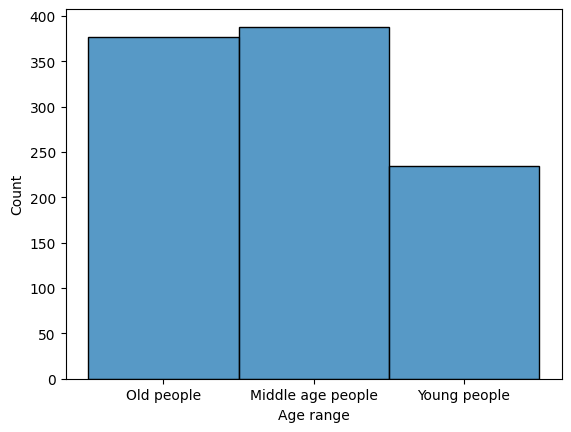

In [29]:
# create a histogram to show and compare voulume of subscribers in different age range
# Exhibit 3-3
sns.histplot(df['Age range'])

In [31]:
# analyze the genre preference of subscribers in different age ranges
# To find out the most welcomed contents for subscribers in each age bracket
# Exhibit 3-4

count_df = df.groupby(['Age range','Favorite_Genre']).size().reset_index(name='Count' )
total_counts = df['Age range'].value_counts().reset_index()
total_counts.columns = ['Age range', 'TotalCount']
count_df = count_df.merge(total_counts, on='Age range')
count_df['Percentage'] = (count_df['Count'] / count_df['TotalCount']) * 100
print(count_df)

            Age range Favorite_Genre  Count  TotalCount  Percentage
0   Middle age people         Action     71         388   18.298969
1   Middle age people         Comedy     98         388   25.257732
2   Middle age people    Documentary     68         388   17.525773
3   Middle age people          Drama     82         388   21.134021
4   Middle age people         Sci-Fi     69         388   17.783505
5          Old people         Action     87         377   23.076923
6          Old people         Comedy     65         377   17.241379
7          Old people    Documentary     73         377   19.363395
8          Old people          Drama     80         377   21.220159
9          Old people         Sci-Fi     72         377   19.098143
10       Young people         Action     47         235   20.000000
11       Young people         Comedy     40         235   17.021277
12       Young people    Documentary     47         235   20.000000
13       Young people          Drama     50     

In [32]:
# calculate and compare the churn rate for each reason in each subscription type
# To find out what is the main reason for Subscribers in each subscription type to churn
# Exhibit 4-1

count_df = df.groupby(['Subscription_Type','Reason_for_Churn']).size().reset_index(name='Count' )
total_counts = df['Subscription_Type'].value_counts().reset_index()
total_counts.columns = ['Subscription_Type', 'TotalCount']
count_df = count_df.merge(total_counts, on='Subscription_Type')
count_df['Percentage'] = (count_df['Count'] / count_df['TotalCount']) * 100
print(count_df)

   Subscription_Type           Reason_for_Churn  Count  TotalCount  Percentage
0              Basic  Dissatisfied with content     21         276    7.608696
1              Basic       Found better service     16         276    5.797101
2              Basic           Personal reasons     21         276    7.608696
3              Basic             Price increase     15         276    5.434783
4            Premium  Dissatisfied with content      8         194    4.123711
5            Premium       Found better service     11         194    5.670103
6            Premium           Personal reasons     12         194    6.185567
7            Premium             Price increase     18         194    9.278351
8           Standard  Dissatisfied with content     23         530    4.339623
9           Standard       Found better service     37         530    6.981132
10          Standard           Personal reasons     29         530    5.471698
11          Standard             Price increase     

In [33]:
# calculate and compare the churn rate for each reason in each Age Range
# To find out what is the main reason for Subscribers in each age braket type to churn
# Exhibit 4-2

count_df = df.groupby(['Age range','Reason_for_Churn']).size().reset_index(name='Count' )
total_counts = df['Age range'].value_counts().reset_index()
total_counts.columns = ['Age range', 'TotalCount']
count_df = count_df.merge(total_counts, on='Age range')
count_df['Percentage'] = (count_df['Count'] / count_df['TotalCount']) * 100
print(count_df)

            Age range           Reason_for_Churn  Count  TotalCount  \
0   Middle age people  Dissatisfied with content     22         388   
1   Middle age people       Found better service     23         388   
2   Middle age people           Personal reasons     23         388   
3   Middle age people             Price increase     27         388   
4          Old people  Dissatisfied with content     18         377   
5          Old people       Found better service     25         377   
6          Old people           Personal reasons     17         377   
7          Old people             Price increase     27         377   
8        Young people  Dissatisfied with content     12         235   
9        Young people       Found better service     16         235   
10       Young people           Personal reasons     22         235   
11       Young people             Price increase     14         235   

    Percentage  
0     5.670103  
1     5.927835  
2     5.927835  
3     6.